# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class.

Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



# Homework Answers

**Q1:**

\begin{equation}
p(pass|quick) = \frac{p(quick|pass) * p(pass)}{p(quick)}
\\
p(pass|quick) = \frac{p(quick|pass) * p(pass)}{p(quick|pass) * p(pass) + p(quick|fail) * p(fail)}
\\
p(pass|quick) = \frac{0.6 * 0.9}{0.6 * 0.9 + 0.3 * 0.1}
\\
≈0.947
\end{equation}


**Q2:**

We have:

\begin{equation}
p(x|θ,n) = C * θ_{1}^{x_1} * ... * θ_{k}^{x_k}
\\
p(θ|α) = C' * θ_{1}^{α_{1}-1} * ... * θ_{k}^{α_{k}-1}
\\
\end{equation}

Consider only kernals of likelihood and prior:

\begin{equation}
p(x|𝜃)p(𝜃) = θ_{1}^{x_1} * θ_{1}^{α_{1}-1} * ... * θ_{k}^{x_k} * θ_{k}^{α_{k}-1}
\\
= θ_{1}^{x_1 + α_{1}-1} * ... * θ_{k}^{x_k + α_{k}-1}
\\
\end{equation}




\begin{equation}\
\\
\textbf{Posterior = } \frac{1}{c} * θ_{1}^{x_1 + α_{1}-1} * ... * θ_{k}^{x_k + α_{k}-1}
\end{equation}

So, the posterior is a **Dirichlet** distribution with updated parameter:
**$x_i + α_i$**.

**Q3:**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial, dirichlet
from scipy import stats
import plotly.figure_factory as ff

np.random.seed(365)

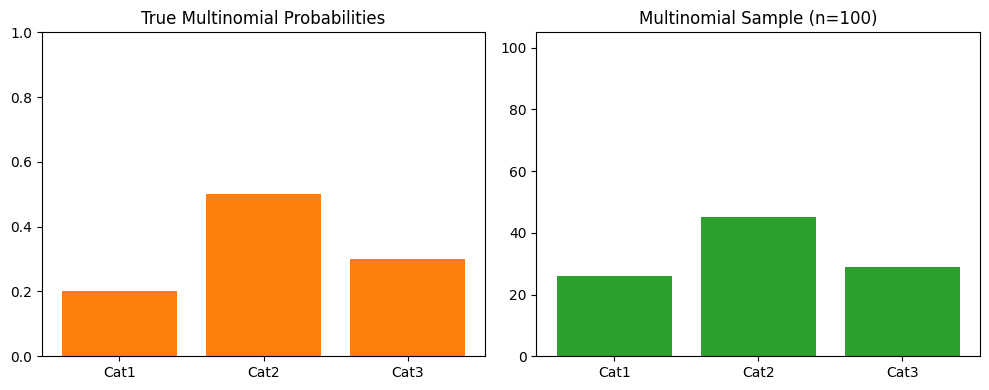

In [14]:
# Multinomial distribution & samples

p_true = np.array([0.2, 0.5, 0.3])
n = 100

sample_multi_counts = multinomial.rvs(n=n, p=p_true, size=1)[0]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Left plot: true probabilities
categories = ['Cat1', 'Cat2', 'Cat3']
ax[0].bar(categories, p_true, color='C1')
ax[0].set_ylim(0, 1)
ax[0].set_title("True Multinomial Probabilities")

# Right plot: observed counts
ax[1].bar(categories, sample_multi_counts, color='C2')
ax[1].set_title(f"Multinomial Sample (n={n})")
ax[1].set_ylim(0, n+5)

plt.tight_layout()
plt.show()

In [15]:
alpha_prior = np.array([1.1, 1.1, 1.1])
dirichlet_prior = dirichlet(alpha_prior)

# Construct the grid (p1, p2, p3) exactly as in your snippet
p1 = np.linspace(0,1,100)
p2 = 1 - p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:] * p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:] * p_[:,np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Prior
prior_pdf = dirichlet_prior.pdf(p.T)

fig_prior = ff.create_ternary_contour(
    p.T,
    prior_pdf,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_prior.update_layout(title='Dirichlet Prior')
fig_prior.show()

# Dirichlet Posterior
alpha_post = alpha_prior + sample_multi_counts
dirichlet_post = dirichlet(alpha_post)

post_pdf = dirichlet_post.pdf(p.T)

fig_post = ff.create_ternary_contour(
    p.T,
    post_pdf,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_post.update_layout(title='Dirichlet Posterior')
fig_post.show()